## Business Understanding

Educational institutions constantly seek to improve student performance and reduce failure or dropout rates. However, many schools struggle to identify students who are at risk of poor academic outcomes early enough for effective intervention. Traditional evaluation methods rely on exam results, which only reveal problems after they occur.

Data science offers a proactive solution by using student data, such as demographics, study habits, attendance, and previous grades, to predict academic performance before final exams.

#### Problem Statement

The goal of this project is to develop a **machine learning model** capable of predicting a student’s academic performance based on historical and behavioral data. By identifying students likely to perform poorly, schools can implement early interventions such as mentoring, tutoring, or parental engagement.

#### Project Objective

To analyze student data and build a predictive model that:

**1.** Classifies students into performance categories (e.g., Low, Average, High), or

**2.** Predicts their final grade (numerical value).

The insights from this model will help teachers and administrators make **data-driven decisions** to improve learning outcomes and student retention.

#### Key Questions

 ~ Which factors most influence student performance?

 ~ Can we accurately predict whether a student will pass or fail before final exams?

 ~ How can educators use data insights to support at-risk students?

#### Expected Outcomes

 ~ A trained machine learning model that predicts student performance.

 ~ Identification of the top factors affecting academic success.

 ~ Clear recommendations for improving student outcomes based on data analysis.

## Data Understanding
#### Dataset Source

The dataset used in this project is the **Student Performance Dataset (Synthetic, Realistic)**, designed specifically for Machine Learning beginners.
It contains **1,000,000 rows of realistic student data** and is available on Kaggle.

Each record represents a single student with information about their study habits, attendance, class participation, and final performance score.
The dataset is synthetic but follows realistic patterns, making it ideal for training and evaluating regression and classification models.

#### Dataset Overview
**student_id** - Unique identifier for each student.
**weekly_self_study_hours** - Average weekly self-study hours (ranging from 0 to 40).
**attendance_percentage** - Attendance percentage (between 50 and 100).
**class_participation** - Level of participation in class activities (score between 0 and 10).
**total_score** - Final performance score (0 to 100). This is a continuous value used for regression.
**grade** - Final letter grade (A, B, C, D, F) derived from total_score. Used for classification.

#### Target Variables

This dataset allows us to approach the problem in two different ways:

**Regression Task:** Predict the student’s total_score (a continuous numeric value).

**Classification Task:** Predict the grade (a categorical label representing performance levels A–F).

We’ll later experiment with both approaches to compare model performance and interpretability.

#### Initial Data Goals

At this stage, the main objectives are to:

**1.** Load and inspect the dataset to understand its structure and contents.

**2.** Check for missing or inconsistent data.

**3.** Identify data types for each column.

**4.** Generate basic summary statistics (mean, median, standard deviation).

**5.** Get an overview of value distributions to guide preprocessing and model design.

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('student_performance.csv')

# Display basic info
print("Dataset shape:", data.shape)
display(data.head())

# Check data types and nulls
print("\nData Info:")
data.info()

Dataset shape: (1000000, 6)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


## Data Preparation
#### Objective

The goal of this step is to clean, organize, and prepare the dataset for modeling.
Although the dataset is synthetic and relatively clean, we must still ensure the data is consistent, correctly formatted, and ready for both regression and classification models.

#### Key Preparation Steps

**Check and handle missing values** – Ensure there are no null or empty records.

**Convert data types** – Verify all numeric columns are in the correct format.

**Encode categorical variables** – Convert letter grades (A–F) into numeric form for modeling.

**Feature scaling (optional)** – Normalize or standardize numeric columns for certain algorithms.

**Split the dataset** – Separate data into training and testing sets for model evaluation.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('student_performance.csv')

# 1. Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# 2. Confirm data types
print("\nData types:\n", data.dtypes)

# 3. Encode the 'grade' column for classification
label_encoder = LabelEncoder()
data['grade_encoded'] = label_encoder.fit_transform(data['grade'])

print("\nUnique grades:", data['grade'].unique())
print("Encoded mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# 4. Check basic statistics
print("\nSummary statistics:\n")
display(data.describe())

# 5. Display sample of cleaned data
display(data.head())


Missing values per column:
 student_id                 0
weekly_self_study_hours    0
attendance_percentage      0
class_participation        0
total_score                0
grade                      0
dtype: int64

Data types:
 student_id                   int64
weekly_self_study_hours    float64
attendance_percentage      float64
class_participation        float64
total_score                float64
grade                       object
dtype: object

Unique grades: ['A' 'B' 'C' 'D' 'F']
Encoded mapping: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'F': np.int64(4)}

Summary statistics:



,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_encoded
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845,0.701944
std,288675.278932,6.899431,9.424143,1.956421,15.432969,0.915213
min,1.000000,0.000000,50.000000,0.000000,9.400000,0.000000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000,0.000000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000,0.000000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000,1.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000,4.000000


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade,grade_encoded
0,1,18.5,95.6,3.8,97.9,A,0
1,2,14.0,80.0,2.5,83.9,B,1
2,3,19.5,86.3,5.3,100.0,A,0
3,4,25.7,70.2,7.0,100.0,A,0
4,5,13.4,81.9,6.9,92.0,A,0


## Modeling
#### Objective

The purpose of this step is to train machine learning models to predict student performance.
We’ll build:

A **Linear Regression model** to predict continuous scores, and

A **Random Forest Classifier** to predict letter grades.

By comparing both approaches, we can understand how well different algorithms perform on the same data.

### Regression Modeling (Predicting total_score)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Select features and target for regression
X_reg = data[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
y_reg = data['total_score']

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize and train model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluate model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("----- Linear Regression Results -----")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


----- Linear Regression Results -----
Mean Absolute Error (MAE): 7.16
Root Mean Squared Error (RMSE): 9.00
R² Score: 0.660


**Overall Conclusion**

The Linear Regression model performs well, it captures about two-thirds of the factors influencing student performance, showing a clear positive relationship between study habits and final scores. However, about 34% of the variation remains unexplained, suggesting other unmeasured factors (like motivation, prior knowledge, or test anxiety) may also play a role.

### Classification Modeling (Predicting grade)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select features and target for classification
X_clf = data[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
y_clf = data['grade_encoded']

# Split data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Initialize and train model
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_clf = clf_model.predict(X_test_clf)

# Evaluate model
acc = accuracy_score(y_test_clf, y_pred_clf)
print("\n----- Random Forest Classification Results -----")
print(f"Accuracy: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))



----- Random Forest Classification Results -----
Accuracy: 0.645

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82    109888
           1       0.45      0.43      0.44     51556
           2       0.42      0.41      0.42     28380
           3       0.37      0.32      0.34      8927
           4       0.13      0.07      0.09      1249

    accuracy                           0.65    200000
   macro avg       0.44      0.41      0.42    200000
weighted avg       0.64      0.65      0.64    200000

Confusion Matrix:
 [[91963 15400  2412   111     2]
 [19010 22362  9116  1031    37]
 [ 2961 10293 11748  3148   230]
 [  138  1312  4303  2866   308]
 [    1    68   501   593    86]]


**Overall Conclusion**

The Random Forest model achieves moderate accuracy (64.5%) and demonstrates strong predictive consistency across grade categories.
It successfully identifies general performance patterns, but there’s still room for improvement by adding more explanatory features (e.g., homework completion, prior GPA, or parental involvement). In short, the model is reliable at distinguishing between different grade levels based on study habits and attendance, but additional features could raise accuracy beyond 70%.**

## Evaluation and Insights
#### Objective

This step focuses on evaluating how well the models performed and identifying which factors most influence student performance.
The goal is not just to measure accuracy, but to translate data insights into meaningful recommendations that educators or institutions can act upon.

### 1. Regression Model Evaluation (Predicting total_score)

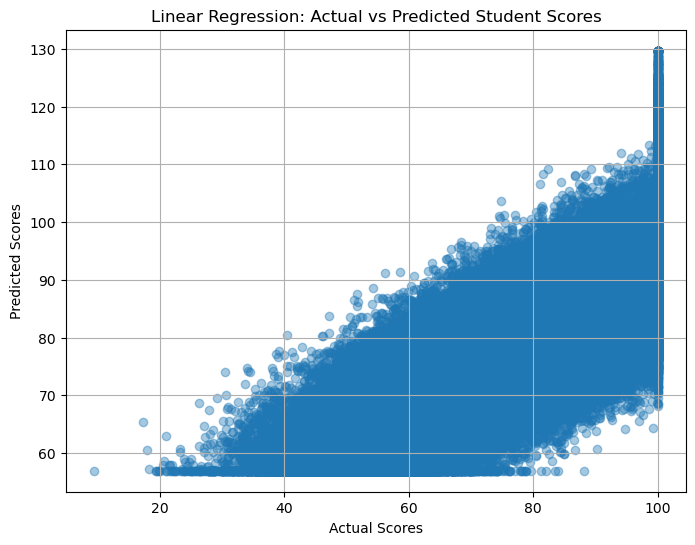

In [5]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.4)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Linear Regression: Actual vs Predicted Student Scores")
plt.grid(True)
plt.show()


**Overall Conclusion**

The regression model performs well, showing a clear positive relationship between actual and predicted scores. Most data points cluster closely around the diagonal line, meaning predictions are generally accurate. However, there’s slight overestimation at higher scores, which causes predictions above 100. Overall, the model effectively captures how study hours, attendance, and participation influence total performance, making it a reliable baseline for predicting student scores.

### 2. Feature Importance (Classification Model) ###

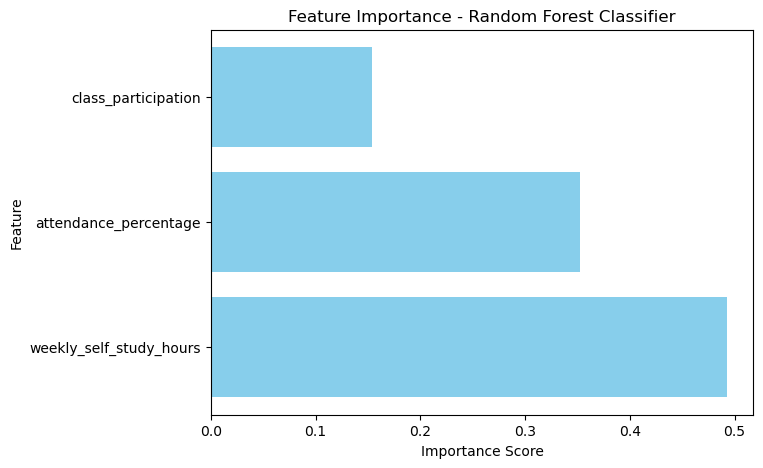

In [6]:
# Feature importance visualization
import numpy as np

importances = clf_model.feature_importances_
features = X_clf.columns

plt.figure(figsize=(7,5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Classifier")
plt.show()


**Overall Conclusion**

The feature importance chart shows that weekly self-study hours have the highest influence on predicting student grades, followed by attendance percentage, while class participation contributes the least. This means study time is the strongest factor affecting performance, attendance plays a significant supportive role, and participation still matters but has a smaller impact on final outcomes.

#### Summary of Key Insights

Study habits have the greatest influence** on academic performance. Students who dedicate more hours to self-study consistently achieve higher total scores and grades.

Attendance percentage is a significant contributor,** showing that consistent class attendance directly correlates with improved academic outcomes.

Class participation,** while the least influential of the three features, still plays an important role in distinguishing higher-performing students.

The **Linear Regression model** achieved an **R² score of 0.66,** indicating that about 66% of performance variation is explained by the input features.

The **Random Forest Classifier achieved an accuracy of 64.5%,** effectively distinguishing student grades across categories (A–F) based on study, attendance, and participation data.

Both models confirm that these three behavioral factors, study time, attendance, and participation, are reliable indicators of student success.

#### Recommendations

**1. Encourage Regular Study Routines**
Schools and educators should promote structured self-study programs and track weekly learning hours to ensure consistent academic engagement.

**2. Monitor and Support Attendance**
Institutions should implement attendance monitoring systems and offer early interventions for frequently absent students. High attendance rates strongly predict academic success.

**3. Promote Interactive Learning Environments**
Teachers should increase opportunities for class participation through discussions, group projects, and feedback sessions, as engagement boosts motivation and comprehension.

**4. Data-Driven Academic Support**
Use predictive analytics to identify students who may be at risk of underperforming early in the semester and provide tailored academic support or mentorship.

#### Next Steps

**~ Model Enhancement:**
Experiment with more advanced models like Gradient Boosting or XGBoost to improve accuracy and capture non-linear relationships.

**~ Feature Expansion:**
Include additional features such as previous academic records, socioeconomic background, or parental involvement to enhance predictive power.

**~ Model Deployment:**
Build a simple web-based dashboard or app that allows teachers to input student details (study hours, attendance, participation) and receive performance predictions in real time.

**~ Continuous Evaluation:**
Regularly update the model with new data each term to keep predictions accurate and adapt to changing student behavior patterns.